In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress

In [3]:
try:
    # Load datasets
    fraud_data = pd.read_csv('../data/Fraud_Data(1).csv')
    ip_to_country = pd.read_csv('../data/IpAddress_to_Country.csv')
    creditcard_data = pd.read_csv('../data/creditcard.csv')
    print("Datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e.filename}")
except pd.errors.ParserError as e:
    print(f"Parsing error: {e}")
except Exception as e:
    print(f"An unexpected error occurred while loading datasets: {e}")


Datasets loaded successfully.


In [4]:
creditcard_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
fraud_data.head(2)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0


In [6]:
ip_to_country.head(5)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [7]:
ip_to_country.head(3)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China


In [8]:
fraud_data.describe()


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [9]:
print("#####################ip###############")
ip_to_country.info()
print("#######################fraud_data#######################################")
fraud_data.info()
print("#######################credit########################################")
creditcard_data.info()


#####################ip###############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
#######################fraud_data#######################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source  

In [ ]:
# check null 
fraud_data.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [11]:
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
ip_to_country.isnull().sum()

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [13]:
data_frames = {
    "fraud_data": fraud_data,
    "ip_to_country": ip_to_country,
    "creditcard_data": creditcard_data
}

# Check and remove duplicates
for name, df in data_frames.items():
    has_duplicates = df.duplicated().any()
    if has_duplicates:
        print(f"Duplicates exist in {name}.")
        data_frames[name] = df.drop_duplicates()
        print(f"Duplicate data is removed from {name}.")
    else:
        print(f"No duplicates found in {name}.")

# Reassign cleaned data back to original variables
fraud_data = data_frames["fraud_data"]
ip_to_country = data_frames["ip_to_country"]
creditcard_data = data_frames["creditcard_data"]


No duplicates found in fraud_data.
No duplicates found in ip_to_country.
Duplicates exist in creditcard_data.
Duplicate data is removed from creditcard_data.


In [14]:
fraud_data.head(2)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0


In [15]:

fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
fraud_data['ip_address'] = fraud_data['ip_address'].astype(int)  # Convert to integer for merging

In [16]:
fraud_data.head(2)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0


In [17]:
def ip_to_int(ip_str):
    try:
        return int(ipaddress.ip_address(ip_str))
    except Exception as e:
        print(f"Error converting IP {ip}: {e}")
        return None

fraud_data['ip_int'] = fraud_data['ip_address'].apply(ip_to_int)

In [18]:
fraud_data.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,732758368
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,350311387
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,2621473820
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,3840542443
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,415583117
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2809315199,0,2809315199
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3987484328,0,3987484328
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1692458727,0,1692458727
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3719094257,0,3719094257
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,341674739,0,341674739


In [19]:
# Ensure IP columns are integers
fraud_data['ip_int'] = fraud_data['ip_int'].astype('int64')
ip_to_country['lower_bound_ip_address'] = ip_to_country['lower_bound_ip_address'].astype('int64')
ip_to_country['upper_bound_ip_address'] = ip_to_country['upper_bound_ip_address'].astype('int64')

In [20]:
#. Merge Fraud Data with IP Location
# ======================================
def map_country(ip):
    match = ip_to_country[(ip_to_country['lower_bound_ip_address'] <= ip) & (ip_to_country['upper_bound_ip_address'] >= ip)]
    if not match.empty:
        return match.iloc[0]['country']
    return 'Unknown'

fraud_data['country'] = fraud_data['ip_int'].apply(map_country)

In [21]:
fraud_data.head(2)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,732758368,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,350311387,United States


In [22]:
# Merge with credit card
# ==========================
# Check common column
print("Credit card columns:", creditcard_data.columns)
print("Fraud columns:", fraud_data.columns)



Credit card columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Fraud columns: Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'ip_int', 'country'],
      dtype='object')


In [23]:
print(fraud_data.columns)
print(fraud_data['ip_address'].head())
print(fraud_data['ip_address'].dtype)


Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'ip_int', 'country'],
      dtype='object')
0     732758368
1     350311387
2    2621473820
3    3840542443
4     415583117
Name: ip_address, dtype: int64
int64


In [24]:
# Feature Engineering
# Transaction frequency
fraud_data['transaction_count'] = fraud_data.groupby('user_id')['user_id'].transform('count')
        
# Transaction velocity
fraud_data = fraud_data.sort_values(['user_id', 'purchase_time'])
fraud_data['time_diff'] = fraud_data.groupby('user_id')['purchase_time'].diff().dt.total_seconds().fillna(0)
        
# Time-based features
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek
fraud_data['time_since_signup'] = (fraud_data['purchase_time'] - 
fraud_data['signup_time']).dt.total_seconds() / 3600
        

In [25]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,country,transaction_count,time_diff,hour_of_day,day_of_week,time_since_signup
116708,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,FGBQNDNBETFJJ,SEO,Chrome,F,25,880217484,0,880217484,United States,1,0.0,10,5,990.273333
15108,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,MKFUIVOHLJBYN,Direct,Safari,F,38,2785906106,0,2785906106,Switzerland,1,0.0,21,5,2788.855278
46047,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,SCQGQALXBUQZJ,SEO,Chrome,M,25,356056736,0,356056736,United States,1,0.0,11,3,1852.000278
67650,9,2015-05-16 15:58:32,2015-05-20 23:06:42,62,IEZOHXPZBIRTE,SEO,FireFox,M,21,759104706,0,759104706,Unknown,1,0.0,23,2,103.136111
109067,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,MSNWCFEHKTIOY,Ads,Safari,M,19,2985180352,0,2985180352,Mexico,1,0.0,20,2,1286.523611



Class Distribution in Fraud_Data:
class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


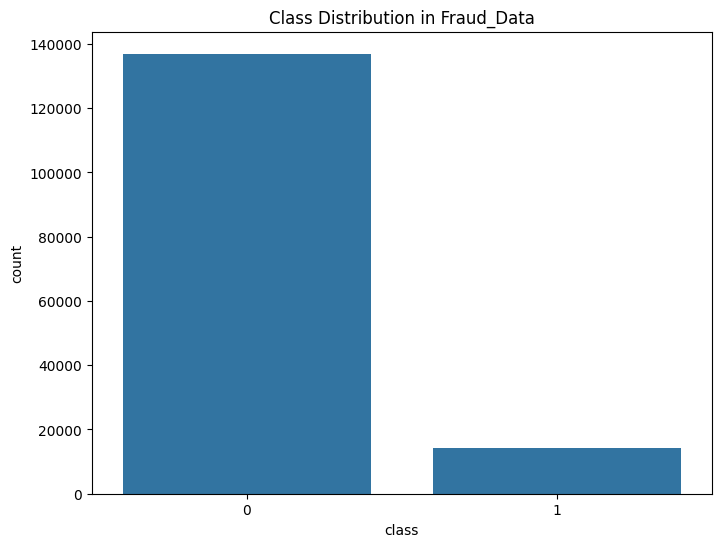

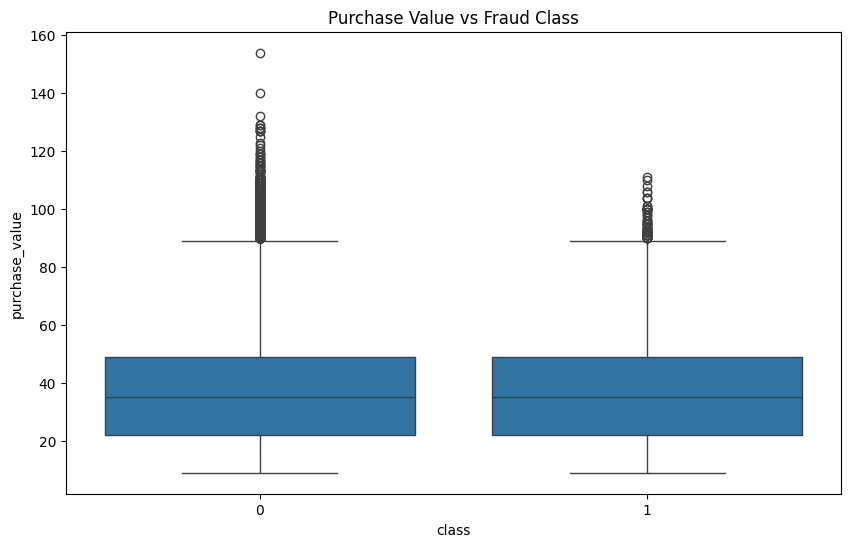

In [26]:
# EDA: Univariate Analysis

print("\nClass Distribution in Fraud_Data:")
print(fraud_data['class'].value_counts(normalize=True))
        
# EDA: Visualizations
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=fraud_data)
plt.title('Class Distribution in Fraud_Data')
plt.show()
plt.close()
        
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title('Purchase Value vs Fraud Class')
plt.show()
plt.close()

In [27]:
# Verify geolocation merge
print('\nTop 5 countries in Fraud_Data:')
print(fraud_data['country'].value_counts().head())


Top 5 countries in Fraud_Data:
country
United States     58049
Unknown           21966
China             12038
Japan              7306
United Kingdom     4490
Name: count, dtype: int64


In [28]:
def transform_data(df, is_fraud_data=True):
    """Transform data: scale numeric features, encode categorical features, and handle class imbalance."""
    try:
        if is_fraud_data:
            numeric_features = ['purchase_value', 'age', 'transaction_count', 
                               'time_diff', 'hour_of_day', 'time_since_signup']
            categorical_features = ['source', 'browser', 'sex', 'country']
            target = 'class'
        else:
            numeric_features = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]
            categorical_features = []
            target = 'Class'
        
        # Split features and target
        X = df.drop(columns=[target])
        y = df[target]
        
        # Train-test split with stratification
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                            random_state=42, stratify=y)
        
        # Create preprocessor for scaling and encoding
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_features),
                ('cat', OneHotEncoder(handle_unknown='ignore'), 
                 categorical_features if is_fraud_data else [])
            ])
        
        # Fit and transform training data
        X_train_transformed = preprocessor.fit_transform(X_train)
        X_test_transformed = preprocessor.transform(X_test)
        
        # Handle class imbalance with SMOTE
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)
        
        return X_train_balanced, X_test_transformed, y_train_balanced, y_test, preprocessor
    except Exception as e:
        print(f"Error in transform_data: {e}")
        raise


In [29]:
# Transform data
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud, fraud_preprocessor = transform_data(
fraud_data, is_fraud_data=True)

In [30]:
# Print shapes
print('\nFraud Data - Training set shape:', X_train_fraud.shape)
print('Fraud Data - Test set shape:', X_test_fraud.shape)



Fraud Data - Training set shape: (219136, 195)
Fraud Data - Test set shape: (30223, 195)


In [31]:
# Save processed datasets
fraud_data.to_csv('../data/processed/fraud_data_processed.csv', index=False)